**Random Walk-White noise series**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mydataraw = pd.read_csv("oilpriceindex.csv")

In [ ]:
mydataraw1 = mydataraw.copy()

In [ ]:
mydataraw.head()

,DATE,WTI,BRENT,INR,NIFTY
0,01-01-1990,22.86,21.25,35.6,0.44
1,02-01-1990,22.11,19.81,35.6,2.45
2,03-01-1990,NaN,18.39,35.9,-0.28
3,04-01-1990,18.43,16.61,36.3,-6.18
4,05-01-1990,18.20,16.35,36.3,-1.62


In [ ]:
mydataraw.describe()

,WTI,BRENT,INR,NIFTY
count,360.000000,359.000000,357.000000,358.000000
mean,47.843528,49.330808,96.766106,0.193324
std,29.194188,32.860975,27.851830,1.890878
min,11.350000,9.820000,35.600000,-6.180000
25%,21.295000,19.755000,76.800000,-0.782500
50%,40.950000,41.580000,95.200000,0.185000
75%,68.397500,70.905000,113.900000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [ ]:
mydataraw.isna()

,DATE,WTI,BRENT,INR,NIFTY
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
356,False,False,False,False,False
357,False,False,False,False,False
358,False,False,False,False,False
359,False,False,False,False,False


In [ ]:
mydataraw.isna().sum()

DATE     0
WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [ ]:
mydataraw.INR.isna().sum()

4

Fill NaN

In [ ]:
mydataraw.WTI = mydataraw.WTI.fillna(method='ffill')

In [ ]:
mydataraw.isna().sum()

DATE     0
WTI      0
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [ ]:
mydataraw.BRENT = mydataraw.BRENT.fillna(method='bfill')

In [ ]:
mydataraw.isna().sum()

DATE     0
WTI      0
BRENT    0
INR      4
NIFTY    3
dtype: int64

In [ ]:
mydataraw.INR = mydataraw.INR.fillna(value= mydataraw.INR.mean())

In [ ]:
mydataraw.NIFTY = mydataraw.NIFTY.fillna(method= 'bfill')

In [ ]:
mydataraw.isna().sum()

DATE     0
WTI      0
BRENT    0
INR      0
NIFTY    0
dtype: int64

In [ ]:
mydataraw1.isna().sum()

DATE     0
WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

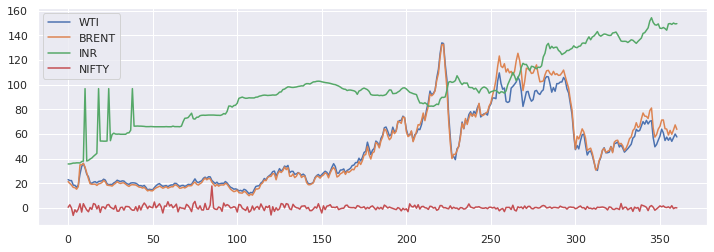

In [ ]:
mydataraw.plot(figsize = (12,4))
plt.show()

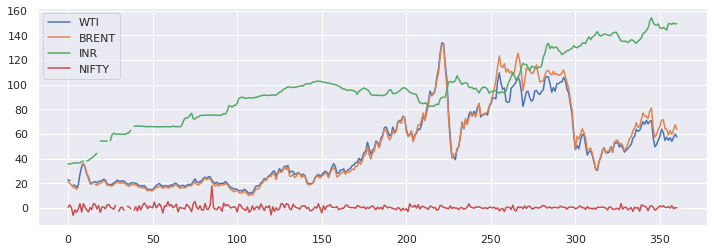

In [ ]:
mydataraw1.plot(figsize = (12,4))
plt.show()

In [ ]:
mydataraw1.WTI = mydataraw1.WTI.fillna(method ='ffill')
mydataraw1.BRENT = mydataraw1.BRENT.fillna(method ='ffill')
mydataraw1.INR = mydataraw1.INR.fillna(method ='ffill')
mydataraw1.NIFTY = mydataraw1.NIFTY.fillna(method ='ffill')

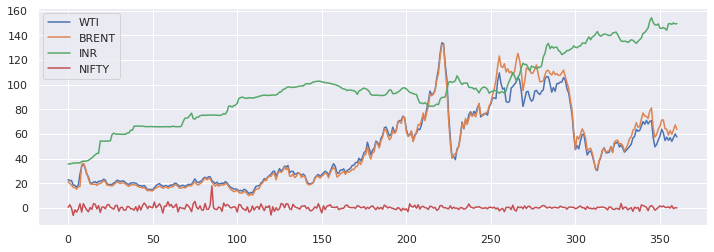

In [ ]:
mydataraw1.plot(figsize = (12,4))
plt.show()

**Quantile-Quantile Plot or QQ Plot**

In [ ]:
import scipy.stats
import pylab

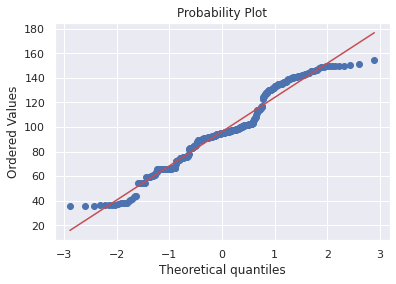

In [ ]:
scipy.stats.probplot(mydataraw1.INR, plot = pylab)
pylab.show()

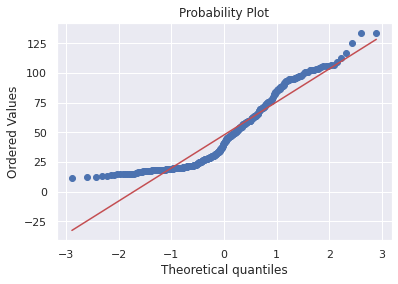

In [ ]:
scipy.stats.probplot(mydataraw1.WTI, plot = pylab)
pylab.show()

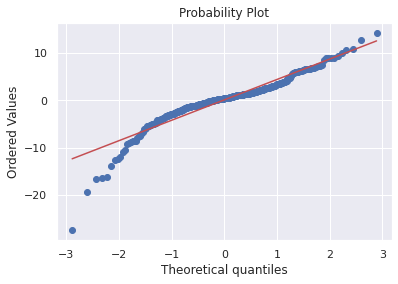

In [ ]:
scipy.stats.probplot(mydataraw1.WTI.diff().dropna(), plot = pylab)
pylab.show()

**Now Convert the DATE column into Timeseries**

In [ ]:
mydataraw1.describe()

,WTI,BRENT,INR,NIFTY
count,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557
std,29.185056,32.851631,28.148450,1.889088
min,11.350000,9.820000,35.600000,-6.180000
25%,21.300000,19.570000,75.500000,-0.790000
50%,40.780000,39.950000,95.100000,0.180000
75%,68.060000,70.760000,113.800000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [ ]:
mydataraw1.DATE.describe()

count            361
unique           361
top       08-01-2017
freq               1
Name: DATE, dtype: object

In [ ]:
mydatats = pd.read_csv("oilpriceindex.csv", na_values= ['null'], index_col= 'DATE', parse_dates= True, infer_datetime_format= True)

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,NaN,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [ ]:
mydatats.WTI = mydatats.WTI.fillna(method ='ffill')
mydatats.BRENT = mydatats.BRENT.fillna(method ='ffill')
mydatats.INR = mydatats.INR.fillna(method ='ffill')
mydatats.NIFTY = mydatats.NIFTY.fillna(method ='ffill')

In [ ]:
mydatats.isna()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,False,False,False,False
1990-02-01,False,False,False,False
1990-03-01,False,False,False,False
1990-04-01,False,False,False,False
1990-05-01,False,False,False,False
...,...,...,...,...
2019-09-01,False,False,False,False
2019-10-01,False,False,False,False
2019-11-01,False,False,False,False


In [ ]:
mydatats.isna().sum()

WTI      0
BRENT    0
INR      0
NIFTY    0
dtype: int64

Create a duplicate variable

In [ ]:
mydatats['INR_INR'] = mydatats.INR

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,INR_INR
DATE,,,,,
1990-01-01,22.86,21.25,35.6,0.44,35.6
1990-02-01,22.11,19.81,35.6,2.45,35.6
1990-03-01,22.11,18.39,35.9,-0.28,35.9
1990-04-01,18.43,16.61,36.3,-6.18,36.3
1990-05-01,18.20,16.35,36.3,-1.62,36.3


In [ ]:
del mydatats['INR_INR']

Spliting the data set into training and Testing

In [ ]:
len(mydatats)

361

In [ ]:
size = int(len(mydatats)*0.8)
mydatats_train = mydatats.iloc[:size]
mydatats_test = mydatats.iloc[size:]


In [ ]:
len(mydatats), len(mydatats_train), len(mydatats_test)

(361, 288, 73)

In [ ]:
mydatats_train.tail()

,WTI,BRENT,INR,NIFTY
DATE,,,,
2013-08-01,106.57,111.28,131.8,-0.15
2013-09-01,106.29,111.60,133.5,0.17
2013-10-01,100.54,109.08,129.2,0.69
2013-11-01,93.86,107.79,131.1,-0.44
2013-12-01,97.63,110.76,129.7,0.29


In [ ]:
mydatats_test.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
2014-01-01,94.62,108.12,130.3,0.34
2014-02-01,100.82,108.90,130.4,0.07
2014-03-01,100.80,107.48,127.8,-0.16
2014-04-01,102.07,107.76,126.6,1.35
2014-05-01,102.18,109.54,124.4,0.65


**White Noise process**

Cov(x,y) = Corr xy * (std.X *std Y)
Cov(xt-i, xt-j) = Corr xt-i, xt-j * Std.Xt-i*stdXt-j  : i in not equal to J

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import  figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
white_noise = np.random.normal(loc = mydatats.INR.mean(), scale= mydatats.INR.std(), size= len(mydatats))
mydatats['WN_INR'] = white_noise

In [ ]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY,WN_INR
count,361.000000,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557,96.080974
std,29.185056,32.851631,28.148450,1.889088,27.858303
min,11.350000,9.820000,35.600000,-6.180000,17.057705
25%,21.300000,19.570000,75.500000,-0.790000,75.303093
50%,40.780000,39.950000,95.100000,0.180000,92.485678
75%,68.060000,70.760000,113.800000,1.080000,116.913154
max,133.880000,132.720000,154.300000,17.740000,185.125936


In [ ]:
mydatats.head(10)

,WTI,BRENT,INR,NIFTY,WN_INR
DATE,,,,,
1990-01-01,22.86,21.25,35.6,0.44,128.503151
1990-02-01,22.11,19.81,35.6,2.45,127.924757
1990-03-01,22.11,18.39,35.9,-0.28,105.980089
1990-04-01,18.43,16.61,36.3,-6.18,85.257261
1990-05-01,18.20,16.35,36.3,-1.62,185.125936
1990-06-01,16.70,15.10,36.5,-3.48,128.752755
1990-07-01,18.45,17.17,36.5,-1.02,117.051668
1990-08-01,27.31,17.17,36.4,3.29,151.341533
1990-09-01,33.51,34.90,37.5,-3.48,88.880756


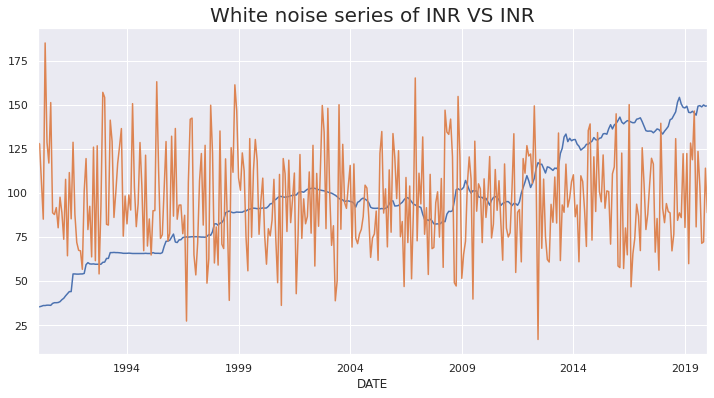

In [ ]:
mydatats.INR.plot(figsize = (12,6))
mydatats.WN_INR.plot(figsize=(12,6))
plt.title('White noise series of INR VS INR', size= 20)
plt.show()

**Test of Stationarity**

In [ ]:
sts.adfuller(mydatats.INR)

(-1.1290406537170836,
 0.7033530053152008,
 1,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1332.3497409741647)

Null Hypothesis: INR is non Stationary - means it is not White noise

In [ ]:
sts.adfuller(mydatats.WN_INR)

(-19.568160858742438,
 0.0,
 0,
 360,
 {'1%': -3.448645946352023,
  '10%': -2.5710650077160495,
  '5%': -2.869602139060357},
 3253.800007208303)

 WN_INR is Stationary - means it is White noise
 INR is Non-Stationaly - it is not white noise

In [ ]:
mydatats1 = mydatats.diff().dropna()


In [ ]:
sts.adfuller(mydatats1.INR)

NameError: ignored

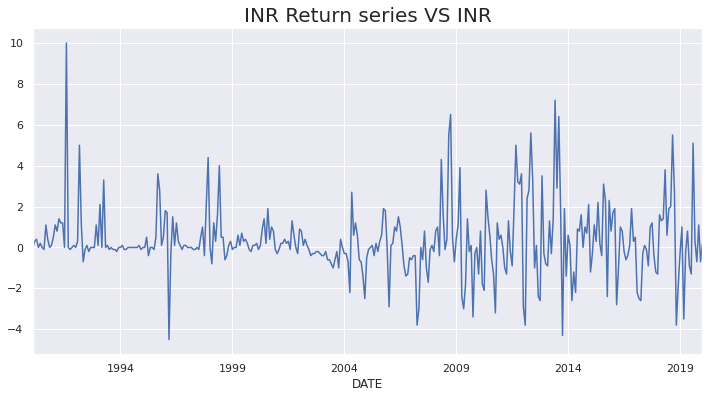

In [ ]:
mydatats1.INR.plot(figsize=(12,6))
plt.title('INR Return series VS INR', size= 20)
plt.show()

**Seasonal Decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

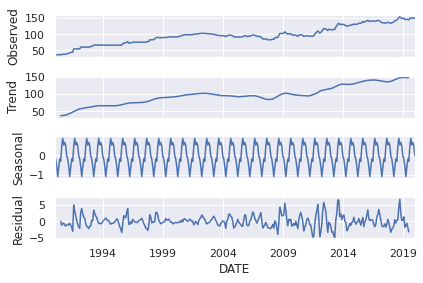

In [ ]:
INR_dec_add = seasonal_decompose(mydatats.INR, model= 'additive')
INR_dec_add.plot()
plt.show()


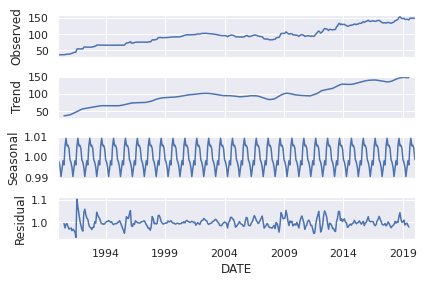

In [ ]:
INR_dec_mul= seasonal_decompose(mydatats.INR, model="multiplicative")
INR_dec_mul.plot()
plt.show()

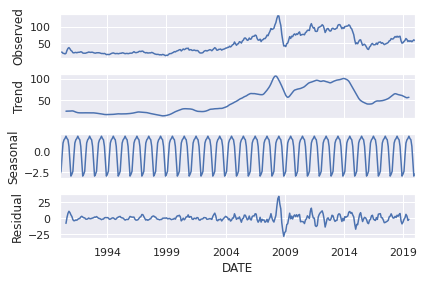

In [ ]:
WTI_dec_add = seasonal_decompose(mydatats.WTI, model= 'additive')
WTI_dec_add.plot()
plt.show()

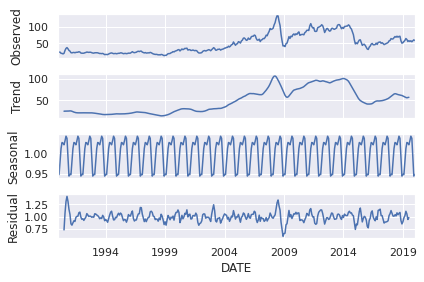

In [ ]:
WTI_dec_mul = seasonal_decompose(mydatats.WTI, model= 'multiplicative')
WTI_dec_mul.plot()
plt.show()

In [ ]:
WTI_dec_mul.resid.head(25)
                       

DATE
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
1990-06-01         NaN
1990-07-01    0.731914
1990-08-01    1.072130
1990-09-01    1.309686
1990-10-01    1.415464
1990-11-01    1.314648
1990-12-01    1.150806
1991-01-01    1.048698
1991-02-01    0.855324
1991-03-01    0.828282
1991-04-01    0.876319
1991-05-01    0.917413
1991-06-01    0.903403
1991-07-01    0.987887
1991-08-01    1.007745
1991-09-01    1.010909
1991-10-01    1.081816
1991-11-01    1.094772
1991-12-01    0.992957
1992-01-01    0.947934
Name: WTI, dtype: float64

**Test of Autocorrelation**

In [ ]:
import statsmodels.graphics.tsaplots as sgt

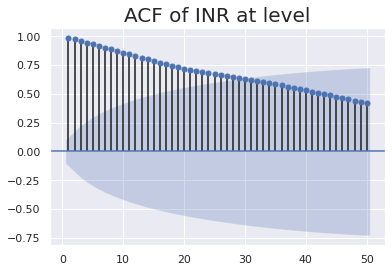

In [ ]:
sgt.plot_acf(mydatats.INR, lags=50, zero = False)
plt.title("ACF of INR at level", size = 20)
plt.show()

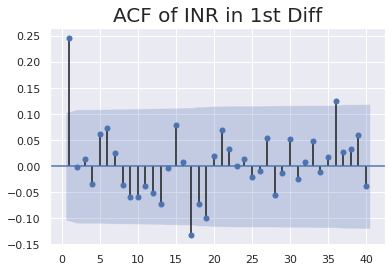

In [ ]:
sgt.plot_acf(mydatats1.INR, lags=40, zero = False)
plt.title("ACF of INR in 1st Diff", size = 20)
plt.show()

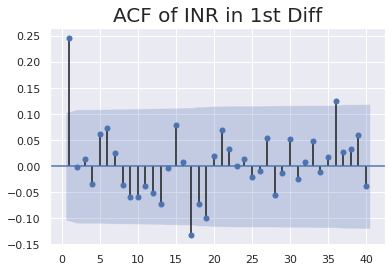

In [ ]:
sgt.plot_acf(mydatats.INR.diff().dropna(), lags=40, zero = False)
plt.title("ACF of INR in 1st Diff", size = 20)
plt.show()

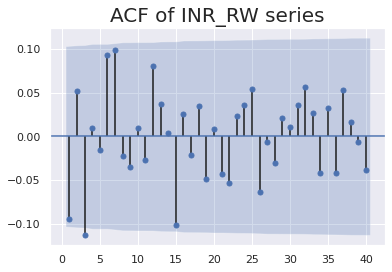

In [ ]:
sgt.plot_acf(mydatats.WN_INR, lags=40, zero = False)
plt.title("ACF of INR_RW series", size = 20)
plt.show()

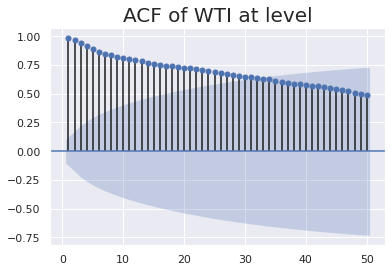

In [ ]:
sgt.plot_acf(mydatats.WTI, lags=50, zero = False)
plt.title("ACF of WTI at level", size = 20)
plt.show()

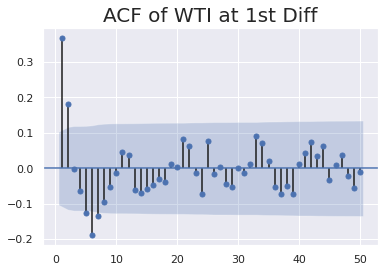

In [ ]:
sgt.plot_acf(mydatats1.WTI, lags=50, zero = False)
plt.title("ACF of WTI at 1st Diff", size = 20)
plt.show()

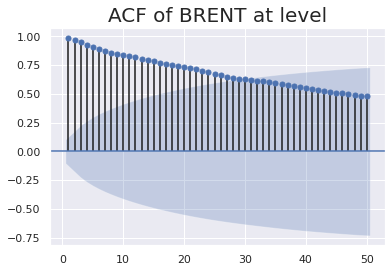

In [ ]:
sgt.plot_acf(mydatats.BRENT, lags=50, zero = False)
plt.title("ACF of BRENT at level", size = 20)
plt.show()

In [ ]:
sts.adfuller(mydatats.BRENT)

(-2.0445626614461365,
 0.26738198461992113,
 1,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1997.8163282525811)

In [ ]:
sgt.plot_acf(mydatats1.BRENT, lags=50, zero = False)
plt.title("ACF of BRENT at 1st Diff", size = 20)
plt.show()

NameError: ignored

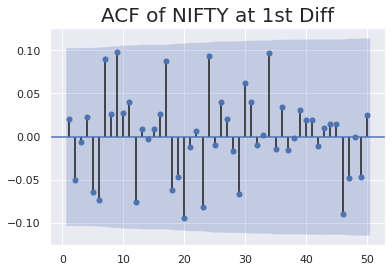

In [ ]:
sgt.plot_acf(mydatats.NIFTY, lags=50, zero = False)
plt.title("ACF of NIFTY at 1st Diff", size = 20)
plt.show()

In [ ]:
sts.adfuller(mydatats.NIFTY)

(-18.541488443588186,
 2.0974181840591345e-30,
 0,
 360,
 {'1%': -3.448645946352023,
  '10%': -2.5710650077160495,
  '5%': -2.869602139060357},
 1392.412250801988)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()


Calculation of Return: [(Yt - Yt-1)/Yt-1] * 100

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR
DATE,,,,,
1990-01-01,22.86,21.25,35.6,0.44,85.232470
1990-02-01,22.11,19.81,35.6,2.45,19.383506
1990-03-01,22.11,18.39,35.9,-0.28,138.248748
1990-04-01,18.43,16.61,36.3,-6.18,83.800509
1990-05-01,18.20,16.35,36.3,-1.62,123.115965


((INRt - INRt-1)/INRt-1) * 100

In [ ]:
mydatats['INR_pct']= mydatats.INR.pct_change(1).mul(100)
mydatats = mydatats.iloc[1:]

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct
DATE,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,19.383506,0.000000
1990-03-01,22.11,18.39,35.9,-0.28,138.248748,0.842697
1990-04-01,18.43,16.61,36.3,-6.18,83.800509,1.114206
1990-05-01,18.20,16.35,36.3,-1.62,123.115965,0.000000
1990-06-01,16.70,15.10,36.5,-3.48,97.694658,0.550964


In [ ]:
mydatats['INR_diff']=mydatats.INR.diff().dropna()
mydatats.INR_diff = mydatats.INR_diff.fillna(method='bfill')

In [ ]:
mydatats.head(10)

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_norm
DATE,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,127.924757,0.000000,100.000000
1990-03-01,22.11,18.39,35.9,-0.28,105.980089,0.842697,100.842697
1990-04-01,18.43,16.61,36.3,-6.18,85.257261,1.114206,101.966292
1990-05-01,18.20,16.35,36.3,-1.62,185.125936,0.000000,101.966292
1990-06-01,16.70,15.10,36.5,-3.48,128.752755,0.550964,102.528090
1990-07-01,18.45,17.17,36.5,-1.02,117.051668,0.000000,102.528090
1990-08-01,27.31,17.17,36.4,3.29,151.341533,-0.273973,102.247191
1990-09-01,33.51,34.90,37.5,-3.48,88.880756,3.021978,105.337079
1990-10-01,36.04,36.02,37.9,3.35,87.889833,1.066667,106.460674


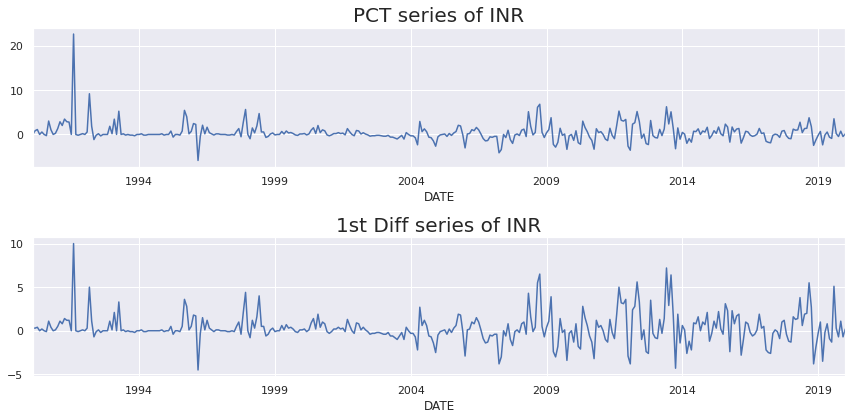

In [ ]:
plt.subplot(2, 1, 1)
mydatats.INR_pct.plot(figsize = (12,6))
plt.title("PCT series of INR", size = 20)

plt.subplot(2, 1, 2)
mydatats.INR_diff.plot(figsize = (12,6))
plt.title("1st Diff series of INR", size = 20)
plt.tight_layout()

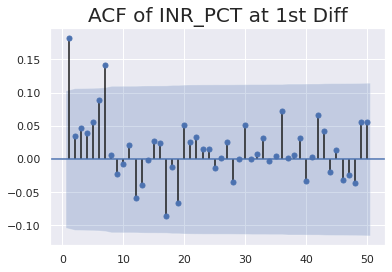

In [ ]:
sgt.plot_acf(mydatats.INR_pct, lags=50, zero = False)
plt.title("ACF of INR_PCT at 1st Diff", size = 20)
plt.show()

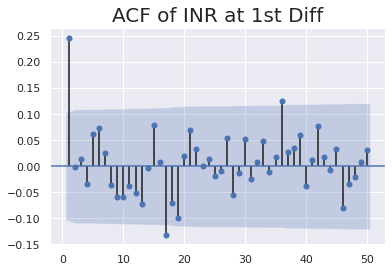

In [ ]:
sgt.plot_acf(mydatats.INR_diff, lags=50, zero = False)
plt.title("ACF of INR at 1st Diff", size = 20)
plt.show()

In [ ]:
sts.adfuller(mydatats.INR_pct)

(-15.70894672146147,
 1.366977224522097e-28,
 0,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1457.1287069991165)

In [ ]:
sts.adfuller(mydatats.INR_diff)

(-14.684104587853644,
 3.122754415903385e-27,
 0,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1328.4328642093606)

**Normanization**

In [ ]:
base_value=mydatats.INR.iloc[0]
mydatats['INR_norm']= mydatats.INR.div(base_value).mul(100)

In [ ]:
mydatats.head(15)

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_norm
DATE,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,127.924757,0.000000,100.000000
1990-03-01,22.11,18.39,35.9,-0.28,105.980089,0.842697,100.842697
1990-04-01,18.43,16.61,36.3,-6.18,85.257261,1.114206,101.966292
1990-05-01,18.20,16.35,36.3,-1.62,185.125936,0.000000,101.966292
1990-06-01,16.70,15.10,36.5,-3.48,128.752755,0.550964,102.528090
1990-07-01,18.45,17.17,36.5,-1.02,117.051668,0.000000,102.528090
1990-08-01,27.31,17.17,36.4,3.29,151.341533,-0.273973,102.247191
1990-09-01,33.51,34.90,37.5,-3.48,88.880756,3.021978,105.337079
1990-10-01,36.04,36.02,37.9,3.35,87.889833,1.066667,106.460674


In [ ]:
mydatats.tail()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct
DATE,,,,,,
2019-09-01,56.95,62.83,149.6,-0.23,103.697582,0.200938
2019-10-01,53.96,59.71,148.9,1.72,71.593698,-0.467914
2019-11-01,57.03,63.21,150.0,-0.69,72.369247,0.738751
2019-12-01,59.88,67.31,149.3,0.12,114.146689,-0.466667
2020-01-01,57.52,63.65,149.5,-0.05,88.924489,0.133958


In [ ]:
sgt.plot_acf(mydatats.INR_norm, lags=50, zero = False)
plt.title("ACF of Normalized INR", size = 20)
plt.show()

AttributeError: ignored

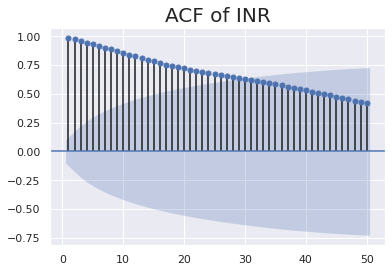

In [ ]:
sgt.plot_acf(mydatats.INR, lags=50, zero = False)
plt.title("ACF of INR", size = 20)
plt.show()

In [ ]:
sts.adfuller(mydatats.INR_norm)

(-1.1307118716098985,
 0.7026702993551432,
 1,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 2035.7422970937664)

How to calculate Z score

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_norm
DATE,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,127.924757,0.000000,100.000000
1990-03-01,22.11,18.39,35.9,-0.28,105.980089,0.842697,100.842697
1990-04-01,18.43,16.61,36.3,-6.18,85.257261,1.114206,101.966292
1990-05-01,18.20,16.35,36.3,-1.62,185.125936,0.000000,101.966292
1990-06-01,16.70,15.10,36.5,-3.48,128.752755,0.550964,102.528090


In [ ]:
mean_dev= mydatats.INR.sub(mydatats.INR.mean())
mydatats['Z_INR']=mean_dev.div(mydatats.INR.std())

In [ ]:
mydatats.head()

,WTI,BRENT,INR,NIFTY,WN_INR,INR_pct,INR_norm,Z_INR
DATE,,,,,,,,
1990-02-01,22.11,19.81,35.6,2.45,127.924757,0.000000,100.000000,-2.171572
1990-03-01,22.11,18.39,35.9,-0.28,105.980089,0.842697,100.842697,-2.160860
1990-04-01,18.43,16.61,36.3,-6.18,85.257261,1.114206,101.966292,-2.146576
1990-05-01,18.20,16.35,36.3,-1.62,185.125936,0.000000,101.966292,-2.146576
1990-06-01,16.70,15.10,36.5,-3.48,128.752755,0.550964,102.528090,-2.139435


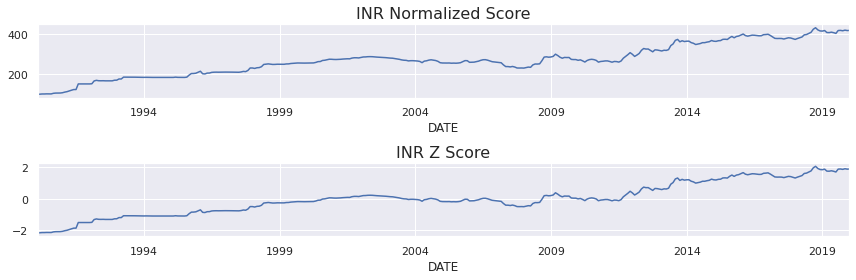

In [ ]:
plt.subplot(2, 1, 1)
mydatats.INR_norm.plot(figsize = (12,4))
plt.title("INR Normalized Score", size = 16)

plt.subplot(2, 1, 2)
mydatats.Z_INR.plot(figsize = (12,4))
plt.title("INR Z Score", size = 16)
plt.tight_layout()

In [ ]:
sts.adfuller(mydatats.INR_norm)

(-1.1307118716098985,
 0.7026702993551432,
 1,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 2035.7422970937664)

In [ ]:
sts.adfuller(mydatats.Z_INR)

(-1.1307118716098998,
 0.7026702993551427,
 1,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 -950.0548470374181)

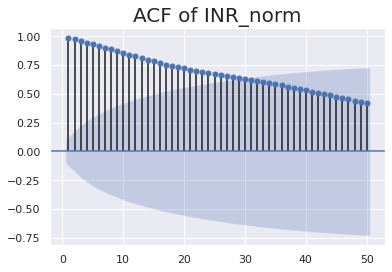

In [ ]:
sgt.plot_acf(mydatats.INR_norm, lags=50, zero = False)
plt.title("ACF of INR_norm", size = 20)
plt.show()

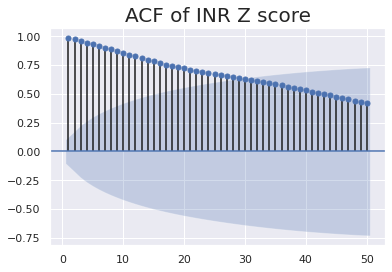

In [ ]:
sgt.plot_acf(mydatats.Z_INR, lags=50, zero = False)
plt.title("ACF of INR Z score", size = 20)
plt.show()